In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fichier = "C:\\Users\HP-PC\\OneDrive\\Documents\\PREDICTION NOTE.xlsx"
df = pd.read_excel(fichier)
print(df.head())

  NOM ETUDIANT PRENOM ETUDIANT GENRE  NOTE  absence  Participation en classe   \
0       AMRANI          RACHID     M    13       15                       2.0   
1     ANDERSON          DANIEL     M    14       12                       3.0   
2     ANDERSON        FREDERIC     M    12       19                       3.0   
3        AZZAM           HAFSA     F    17       14                       4.0   
4     BEAULIEU          EMILIE     F    19        8                       2.0   

   Interactions sociales activités parascolaires  Temps d'étude   \
0                    3.0                     OUI               3   
1                    3.0                     OUI               4   
2                    4.5                     OUI               6   
3                    1.0                     NON               1   
4                    2.5                     NON               4   

  Niveau de langue Type d'école  
0               A2       PUBLIC  
1               A2       PUBLIC  
2 

In [3]:
print(df.isnull().sum())

NOM ETUDIANT                0
PRENOM ETUDIANT             0
GENRE                       0
NOTE                        0
absence                     0
Participation en classe     0
Interactions sociales       0
activités parascolaires     0
Temps d'étude               0
Niveau de langue            0
Type d'école                0
dtype: int64


In [4]:
print(df.columns)
val_moy = df['NOTE'].mean()
ecart_type = df['NOTE'].std()
print(" valeur moyenne : ",val_moy," ecart type : ",ecart_type)
seuil_inf = val_moy - 3 * ecart_type 
seuil_sup = val_moy + 3 * ecart_type 
val_aberantes = df[(df['NOTE'] < seuil_inf) | (df['NOTE'] > seuil_sup)]
print(val_aberantes)

Index(['NOM ETUDIANT', 'PRENOM ETUDIANT', 'GENRE', 'NOTE', 'absence',
       'Participation en classe ', 'Interactions sociales',
       'activités parascolaires', 'Temps d'étude ', 'Niveau de langue',
       'Type d'école'],
      dtype='object')
 valeur moyenne :  14.4  ecart type :  3.293703819180597
Empty DataFrame
Columns: [NOM ETUDIANT, PRENOM ETUDIANT, GENRE, NOTE, absence, Participation en classe , Interactions sociales, activités parascolaires, Temps d'étude , Niveau de langue, Type d'école]
Index: []


In [5]:
from sklearn.ensemble import IsolationForest

# Create the model Isolation Forest
model = IsolationForest(contamination = 0.05)  # Choisir le taux de contamination en fonction de votre seuil de tolérance

# Entraine the model
model.fit(df[['NOTE']])

# outliers' prediction 
outliers = model.predict(df[['NOTE']])
outliers = df[outliers == -1]
outliers

,NOM ETUDIANT,PRENOM ETUDIANT,GENRE,NOTE,absence,Participation en classe,Interactions sociales,activités parascolaires,Temps d'étude,Niveau de langue,Type d'école
62,MARVA,ORION,M,9,12,1.0,4.0,OUI,2,B2,PUBLIC
63,MICHAUD,JOSEE,M,5,12,0.5,3.0,OUI,3,B2,PUBLIC


In [6]:
# now we will deleate the outliers values from our data 
new_df = df.drop(outliers.index,axis = 0)
new_df

,NOM ETUDIANT,PRENOM ETUDIANT,GENRE,NOTE,absence,Participation en classe,Interactions sociales,activités parascolaires,Temps d'étude,Niveau de langue,Type d'école
0,AMRANI,RACHID,M,13,15,2.0,3.0,OUI,3,A2,PUBLIC
1,ANDERSON,DANIEL,M,14,12,3.0,3.0,OUI,4,A2,PUBLIC
2,ANDERSON,FREDERIC,M,12,19,3.0,4.5,OUI,6,A2,PUBLIC
3,AZZAM,HAFSA,F,17,14,4.0,1.0,NON,1,A2,PUBLIC
4,BEAULIEU,EMILIE,F,19,8,2.0,2.5,NON,4,A2,PUBLIC
...,...,...,...,...,...,...,...,...,...,...,...
95,TREMBLAY,STEPHANE,M,16,10,4.0,4.0,OUI,5,B1,MILITAIRE
96,WELL,ROXANE,M,8,28,1.5,4.5,NON,6,B1,MILITAIRE
97,WHITE,LAURENT,M,11,30,2.5,4.0,NON,1,B1,MILITAIRE
98,WILSON,MARC,M,18,22,3.0,4.0,NON,0,A2,MILITAIRE


In [7]:
new_df.describe()

,NOTE,absence,Participation en classe,Interactions sociales,Temps d'étude
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,14.551020,24.193878,2.882653,3.520408,2.642857
std,3.136491,20.112907,1.361853,0.855300,1.927821
min,8.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,11.250000,2.000000,3.000000,1.000000
50%,15.000000,21.000000,3.000000,3.500000,2.000000
75%,17.000000,32.000000,4.000000,4.000000,4.000000
max,20.000000,92.000000,5.000000,5.000000,6.000000


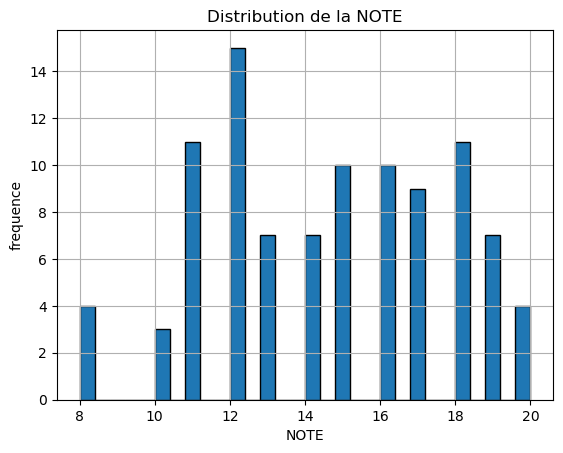

In [8]:
# histogramme for the column NOTE 
plt.hist(new_df['NOTE'],bins = 30 , edgecolor = 'black')
plt.title('Distribution de la NOTE')
plt.xlabel('NOTE')
plt.ylabel('frequence')
plt.grid(True)
plt.show()

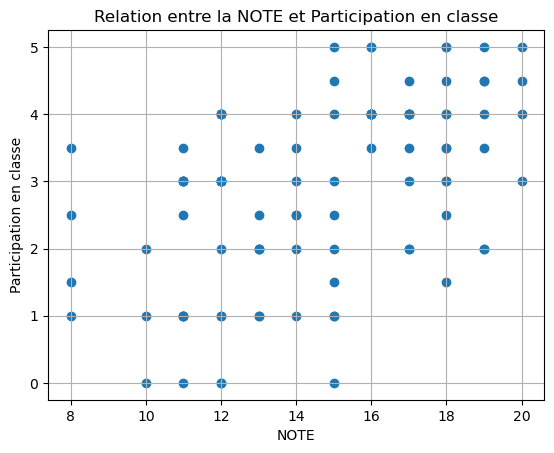

In [9]:
# scatterplot between NOTE and class participation
plt.scatter(new_df['NOTE'],new_df['Participation en classe '])
plt.title('Relation entre la NOTE et Participation en classe')
plt.xlabel('NOTE')
plt.ylabel('Participation en classe')
plt.grid(True)
plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

X = df[['Participation en classe ', 'Temps d\'étude ']]
y = df['NOTE']

# Choisissez le modèle (Gradient Boosting ici)
model = GradientBoostingRegressor(random_state=42)

# Choisissez le nombre de plis (k)
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Utilisez cross_val_score pour évaluer le modèle avec la validation croisée
rmse_scores_gb = np.sqrt(-cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = k_fold))
r2_scores_gb = cross_val_score(model, X, y, scoring="r2", cv=k_fold)

# Affichez les résultats
print(f"RMSE Scores (Gradient Boosting): {rmse_scores_gb}")
print(f"RMSE Mean (Gradient Boosting): {rmse_scores_gb.mean()}")

print(f"R² Scores (Gradient Boosting): {r2_scores_gb}")
print(f"R² Mean (Gradient Boosting): {r2_scores_gb.mean()}")


RMSE Scores (Gradient Boosting): [3.03997393 3.23472151 3.42803821 2.96898117 3.19823928]
RMSE Mean (Gradient Boosting): 3.1739908197451165
R² Scores (Gradient Boosting): [ 0.08928884 -0.04010172 -0.04666631  0.12093252  0.10175768]
R² Mean (Gradient Boosting): 0.045042201764873724
